<a href="https://colab.research.google.com/github/ravi-murugesan/ftds6/blob/master/Train_model_Lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
import gc

## Preprocessing

In [0]:
train = pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/trainA.csv')

# test = pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/testA.csv')


In [0]:
train.isna().sum()

Unnamed: 0                   0
building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [0]:
train1 = train.drop(['year_built','floor_count','cloud_coverage','Unnamed: 0'], axis=1)

In [0]:
train1.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,25.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,25.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,25.0,20.0,NaN,1019.7,0.0,0.0


In [0]:
train1.groupby('primary_use')['meter_reading'].mean().sort_values()

primary_use
Religious worship                   5.375846
Warehouse/storage                  54.362314
Technology/science                138.204258
Other                             138.703786
Retail                            139.782388
Parking                           169.386801
Lodging/residential               279.710439
Manufacturing/industrial          285.897005
Public services                   288.237846
Food sales and service            304.908018
Entertainment/public assembly     473.880691
Utility                           512.736861
Office                            526.504420
Healthcare                        738.597583
Services                         4113.468284
Education                        4585.091840
Name: meter_reading, dtype: float64

In [0]:
lst1 = list(train1.groupby('primary_use')['meter_reading'].mean().sort_values().index)
lst1
lst2 = list(range(1,(len(lst1)+1)))
di = dict(zip(lst1,lst2))
print(di)

{'Religious worship': 1, 'Warehouse/storage': 2, 'Technology/science': 3, 'Other': 4, 'Retail': 5, 'Parking': 6, 'Lodging/residential': 7, 'Manufacturing/industrial': 8, 'Public services': 9, 'Food sales and service': 10, 'Entertainment/public assembly': 11, 'Utility': 12, 'Office': 13, 'Healthcare': 14, 'Services': 15, 'Education': 16}


In [0]:
train1['primary_use'].replace(di, inplace=True)
train1.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,NaN,1019.7,0.0,0.0


In [0]:
train1.isna().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature         96658
dew_temperature        100140
precip_depth_1_hr     3749023
sea_level_pressure    1231669
wind_direction        1449048
wind_speed             143676
dtype: int64

In [0]:
train2 = train1.ffill()

In [0]:
train2.isna().sum()

building_id              0
meter                    0
timestamp                0
meter_reading            0
site_id                  0
primary_use              0
square_feet              0
air_temperature          0
dew_temperature          0
precip_depth_1_hr     2301
sea_level_pressure       0
wind_direction           0
wind_speed               0
dtype: int64

In [0]:
train2 =  train2.fillna(0)


In [0]:
train2.isnull().any()

building_id           False
meter                 False
timestamp             False
meter_reading         False
site_id               False
primary_use           False
square_feet           False
air_temperature       False
dew_temperature       False
precip_depth_1_hr     False
sea_level_pressure    False
wind_direction        False
wind_speed            False
dtype: bool

In [0]:
train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0


In [0]:
write1 = train2.to_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/trainAA.csv')

In [0]:
train2['sin_dire'] = np.sin(2*np.pi*(train2.wind_direction/360))
train2['cos_dire'] = np.cos(2*np.pi*(train2.wind_direction/360))

train2['sin_s'] = train2['wind_speed']*train2['sin_dire']
train2['cos_s'] = train2['wind_speed']*train2['cos_dire']

train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,sin_dire,cos_dire,sin_s,cos_s
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
train2.plot.scatter('sin_s','cos_s').set_aspect('equal')

In [0]:
train2 = train2.drop(['wind_direction','wind_speed','sin_dire','cos_dire'],axis=1)

In [0]:
del train

In [0]:
del train1

In [0]:
train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s
0,0,0,2016-01-01 00:00:00,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0


In [0]:
train2['timestamp'] = pd.to_datetime(train2.timestamp)

train2['Hour'] = train2['timestamp'].dt.hour
train2['HOD'] = train2['Hour'].apply(lambda x: (x+1)*60*60)

seconds_in_day = 24*60*60

train2['sin_time'] = np.sin(2*np.pi*train2.HOD/seconds_in_day)
train2['cos_time'] = np.cos(2*np.pi*train2.HOD/seconds_in_day)

train2.head(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,Hour,HOD,sin_time,cos_time
0,0,0,2016-01-01,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926
1,1,0,2016-01-01,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926
2,2,0,2016-01-01,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926


In [0]:
train2['DOY'] = train2['timestamp'].dt.dayofyear

In [0]:
train2.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'sin_s', 'cos_s', 'Hour',
       'HOD', 'sin_time', 'cos_time', 'DOY'],
      dtype='object')

In [0]:
train2 = train2.drop('timestamp',axis=1)
train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,Hour,HOD,sin_time,cos_time,DOY
0,0,0,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926,1
1,1,0,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926,1
2,2,0,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0,3600,0.258819,0.965926,1


In [0]:
train2 = train2.drop(['Hour','HOD'],axis=1)
train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,7432,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,2720,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,5376,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1


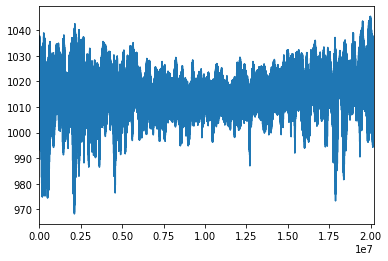

In [0]:
# train2['square_feet'].plot()
train2['sea_level_pressure'].plot()

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train2[['square_feet']] = scaler.fit_transform(train2[['square_feet']])

train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,0.008173,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,0.002786,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,0.005822,25.0,20.0,0.0,1019.7,0.0,0.0,0.258819,0.965926,1


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train2[['sea_level_pressure']] = scaler.fit_transform(train2[['sea_level_pressure']])

train2.head(3)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,0.008173,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,0.002786,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,0.005822,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1


In [0]:
write1= train2.to_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/train_A_final.csv')

## Regerssion 

In [4]:
train2 = pd.read_csv('/content/drive/My Drive/Energy/ashrae-energy-prediction/train_A_final.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
train2.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,sin_s,cos_s,sin_time,cos_time,DOY
0,0,0,0.0,0,16,0.008173,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
1,1,0,0.0,0,16,0.002786,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
2,2,0,0.0,0,16,0.005822,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
3,3,0,0.0,0,16,0.026754,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1
4,4,0,0.0,0,16,0.132985,25.0,20.0,0.0,0.666235,0.0,0.0,0.258819,0.965926,1


In [0]:
from sklearn.model_selection import train_test_split

x = train2.drop(['meter_reading'],axis=1)
y = train2['meter_reading']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16172880, 14), (4043220, 14), (16172880,), (4043220,))

In [0]:
# del train2
import gc
gc.collect();

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import math

## Light GBM Regressor

In [0]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


hyper_params = {
    'boosting_type' : 'dart',
    'metric': ['l2', 'mean_squared_log_error'],
    'learning_rate': 0.18,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 12,
    "num_leaves": 256,  
    "max_bin": 25,
    "num_iterations": 300,
    "n_estimators": 250
}

gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=25)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [0]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


hyper_params = {
    'boosting_type' : 'dart',
    'metric': ['l2', 'mean_squared_log_error'],
    'learning_rate': 0.08,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 12,
    "num_leaves": 256,  
    "max_bin": 25,
    "num_iterations": 300,
    "n_estimators": 250
}

gbm = lgb.LGBMRegressor(** hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=25)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 2.42022e+10	valid_0's l1: 3699.38


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's l2: 2.38539e+10	valid_0's l1: 3663.67
[3]	valid_0's l2: 2.23738e+10	valid_0's l1: 3533.21
[4]	valid_0's l2: 2.05726e+10	valid_0's l1: 3390.48
[5]	valid_0's l2: 1.79417e+10	valid_0's l1: 3160.41
[6]	valid_0's l2: 1.6837e+10	valid_0's l1: 3065.1
[7]	valid_0's l2: 1.47826e+10	valid_0's l1: 2864.03
[8]	valid_0's l2: 1.45632e+10	valid_0's l1: 2836.16
[9]	valid_0's l2: 1.42223e+10	valid_0's l1: 2815.54
[10]	valid_0's l2: 1.3851e+10	valid_0's l1: 2803.28
[11]	valid_0's l2: 1.30373e+10	valid_0's l1: 2727.1
[12]	valid_0's l2: 1.39496e+10	valid_0's l1: 2821.13
[13]	valid_0's l2: 1.39054e+10	valid_0's l1: 2831.58
[14]	valid_0's l2: 1.22396e+10	valid_0's l1: 2652.73
[15]	valid_0's l2: 1.08389e+10	valid_0's l1: 2489.46
[16]	valid_0's l2: 9.64799e+09	valid_0's l1: 2343.92
[17]	valid_0's l2: 9.47189e+09	valid_0's l1: 2341.48
[18]	valid_0's l2: 8.46964e+09	valid_0's l1: 2208.76
[19]	valid_0's l2: 8.06294e+09	valid_0's l1: 2161.2
[20]	valid_0's l2: 7.94393e+09	valid_0's l1: 2164.7
[21]	va

In [0]:
import pickle
pickle.dump(gbm, open("/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_2_energy.pickle.dat", "wb"))

In [0]:
loaded_model = pickle.load(open("/content/drive/My Drive/Energy/ashrae-energy-prediction/lgb_2_energy.pickle.dat", "rb"))

In [0]:
# predict
y_pred = loaded_model.predict(X_test)
y_pred[y_pred < 0] = 0

# eval
print("Test Data metrics")
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

# GDBoost Regressor

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error


model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.25, max_depth=3, random_state=42, loss='ls',n_iter_no_change=100,tol=0.1)
model.fit(X_train, y_train)

mean_squared_error(y_train, model.predict(X_train))

y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0

# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f"Root Mean squared Log error: {math.sqrt(mean_squared_log_error(y_test, y_pred)) :.2f}")

# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')



# others

In [0]:
sns.heatmap(test.iloc[:,8:].isnull())

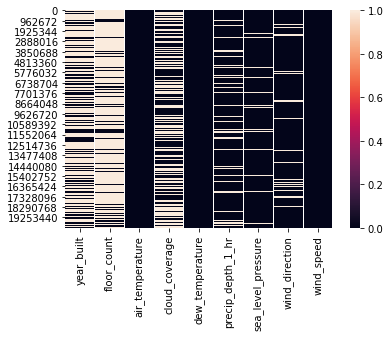

In [0]:
sns.heatmap(train.iloc[:,8:].isnull())